Extracting D:\myjupyter\train-images-idx3-ubyte.gz
Extracting D:\myjupyter\train-labels-idx1-ubyte.gz
Extracting D:\myjupyter\t10k-images-idx3-ubyte.gz
Extracting D:\myjupyter\t10k-labels-idx1-ubyte.gz


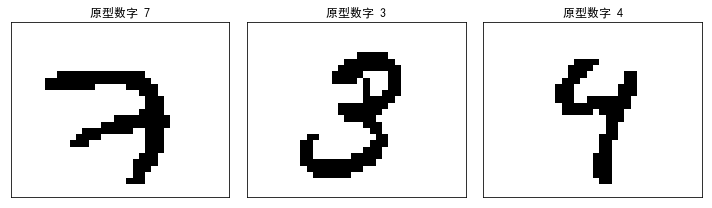

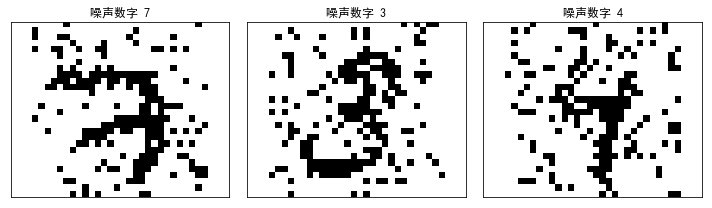

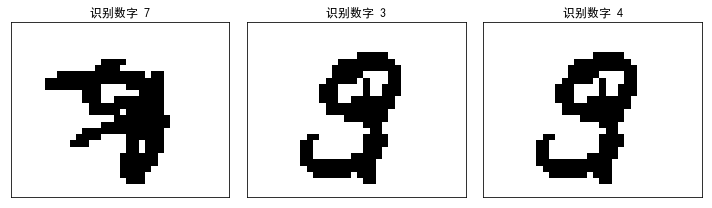

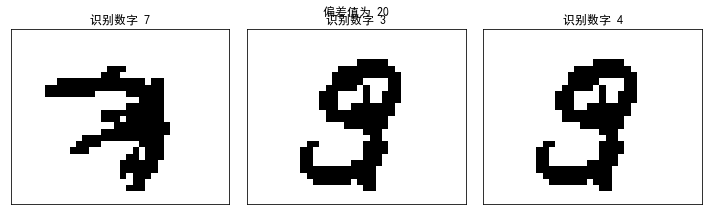

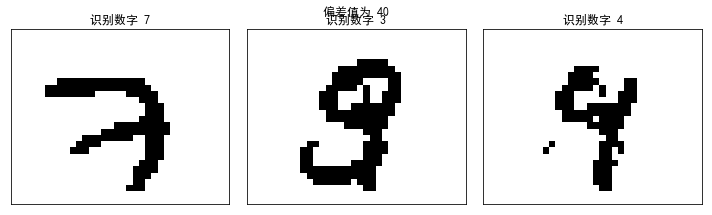

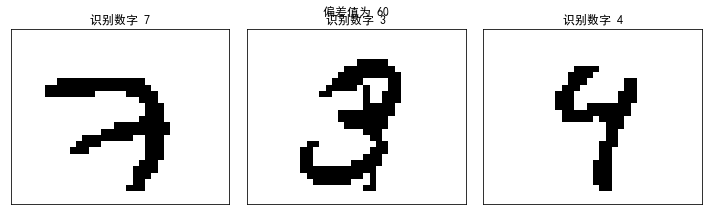

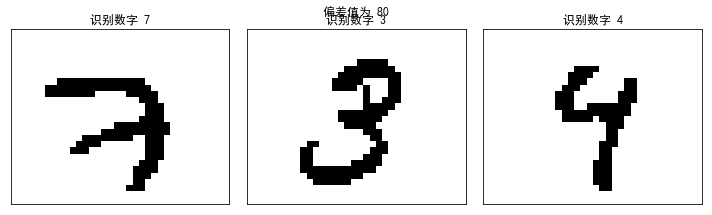

In [78]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# plt图表的中文显示设置
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

# 定义hopfield类
class HopfieldNet: 
    def __init__(self, train, bias = 1):
        self.bias = bias # 偏置值
        self.dim = len(train[0])
        self.patterns = len(train) # 样本数
        self.W = np.zeros((self.dim, self.dim))
        mean = np.sum([np.sum(t) for t in train]) / (self.patterns * self.dim)
        # 初始化权值矩阵
        for i in range(self.patterns):
            t = train[i] - mean
            self.W += np.outer(t,t)
       
        # 因为hopfield网不与自身连接，所以权值矩阵的主对角线为0
        for j in range(self.dim):
            self.W[j,j] = 0
        self.W /= self.patterns
    
    def free_energy(self, x):
        y = - x.dot(self.W).dot(x) + np.sum(x * self.bias)
        return y

    def sync_update(self, x):
        a = self.W.dot(x) - self.bias
        x = np.sign(a)
        return x

# 加噪函数
def addnoise(train,error_rate):
    test = np.copy(train)
    for i, t in enumerate(test):
        s = np.random.binomial(1, error_rate, len(t))
        for j in range(len(t)):
            if s[j] != 0:
                t[j] *= -1
    return test

# 绘图
def painting(data_set,title,bias = 0):
    fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(10, 3),  sharex = True, sharey = True)
    if bias != 0:
        fig.suptitle(f'偏差值为 {bias}',)
    ax = ax.flatten()
    for i in range(len(data_set)):
        img = data_set[i].reshape(28,28)
        ax[i].imshow(img,cmap='Greys',interpolation='nearest')
        ax[i].set_title(f'{title} {y_train[i]}')

    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # 读取mnist数据
    MNIST_data = r'D:\myjupyter'
    mnist = input_data.read_data_sets(MNIST_data,one_hot = False)
    # 读取前三张图片的数据
    y_train = mnist.train.labels[0:3]
    train = [mnist.train.images[0],mnist.train.images[1],mnist.train.images[2]]
    
    # 转换为二值形式
    train = [np.sign(t * 2 - 1) for t in train]
    painting(train,'原型数字')# 绘图
    
    # 图像加噪
    test = addnoise(train,0.15)
    painting(test,'噪声数字')# 绘图
    
    # 创建hopfield网
    model = HopfieldNet(train)
    # 训练100次
    for b in range(80):
        predict =[]
        model.bias = b
        for t in test:
            t_new = model.sync_update(t)
            predict.append(t_new)
        
        if b%20 == 0:
            painting(predict,'识别数字',b)
    
    painting(predict,'识别数字',80)# 绘图
